## Import and Install dependencies

In [1]:
import torchvision
from google.colab.patches import cv2_imshow

In [2]:
import numpy as np
import pandas as pd
import os
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.io import read_image, ImageReadMode

In [3]:
!pip install fiftyone
!pip install fiftyone-db-ubuntu2204

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.1/677.1 kB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.5/192.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/utils.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_eval.py
!wget https://raw.githubusercontent.com/pytorch/vision/main/references/detection/coco_utils.py

--2023-12-02 15:40:33--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/transforms.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23628 (23K) [text/plain]
Saving to: ‘transforms.py’

transforms.py       100%[===================>]  23.07K  --.-KB/s    in 0.004s  

2023-12-02 15:40:33 (5.87 MB/s) - ‘transforms.py’ saved [23628/23628]

--2023-12-02 15:40:33--  https://raw.githubusercontent.com/pytorch/vision/main/references/detection/engine.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4063 (4.0K)

# Import Dataset

In [6]:
import fiftyone as fo
import fiftyone.zoo as foz

# Load the COCO-2017 dataset
# This will download it from the FiftyOne Dataset Zoo if necessary
dataset = foz.load_zoo_dataset("coco-2017", split="train", label_types=["detections"], classes=["person"], max_samples=4000, seed=43)
dataset_test = foz.load_zoo_dataset("coco-2017", split="validation", label_types=["detections"], classes=["person"], max_samples=500, seed=43)

# Print summary information about the view
print(dataset)

Migrating database to v0.22.3


INFO:fiftyone.migrations.runner:Migrating database to v0.22.3


INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/coco-2017/train' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [18.9s elapsed, 0s remaining, 118.5Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [18.9s elapsed, 0s remaining, 118.5Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_train2017.json'


INFO:fiftyone.utils.coco:Downloading 4000 images


 100% |████████████████| 4000/4000 [41.8m elapsed, 0s remaining, 1.7 images/s]      


INFO:eta.core.utils: 100% |████████████████| 4000/4000 [41.8m elapsed, 0s remaining, 1.7 images/s]      


Writing annotations for 4000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 4000 downloaded samples to '/root/fiftyone/coco-2017/train/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'train'


 100% |███████████████| 4000/4000 [31.2s elapsed, 0s remaining, 156.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 4000/4000 [31.2s elapsed, 0s remaining, 156.7 samples/s]      


Dataset 'coco-2017-train-4000' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-train-4000' created


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Found annotations at '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 500 images


 100% |██████████████████| 500/500 [5.4m elapsed, 0s remaining, 1.3 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 500/500 [5.4m elapsed, 0s remaining, 1.3 images/s]      


Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 500 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 500/500 [3.0s elapsed, 0s remaining, 165.1 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 500/500 [3.0s elapsed, 0s remaining, 165.1 samples/s]      


Dataset 'coco-2017-validation-500' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-500' created


Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [7]:
# Choose a random subset of 20 samples to add predictions to
dataset_view = dataset.take(20, seed=43)
session = fo.launch_app(dataset_view)


Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.22.3

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [8]:
# Iterate over the dataset
for sample in dataset:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [9]:
# Iterate over the dataset_test
for sample in dataset_test:
    # Get the detections
    detections = sample.ground_truth.detections
    # Filter out non-person detections
    detections = [d for d in detections if d.label == "person"]
    # Update the detections
    sample.ground_truth.detections = detections
    # Save the sample
    sample.save()

In [10]:
view = dataset.view()
sample = view.take(1).first()
sample

<SampleView: {
    'id': '656b5a0abadc0384e810f641',
    'media_type': 'image',
    'filepath': '/root/fiftyone/coco-2017/train/data/000000016123.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': None,
        'mime_type': None,
        'width': 480,
        'height': 640,
        'num_channels': None,
    }>,
    'ground_truth': <Detections: {
        'detections': [
            <Detection: {
                'id': '656b5a0abadc0384e810f5b8',
                'attributes': {},
                'tags': [],
                'label': 'person',
                'bounding_box': [
                    0.14560416666666667,
                    0.18221875,
                    0.8536874999999999,
                    0.80728125,
                ],
                'mask': None,
                'confidence': None,
                'index': None,
                'supercategory': 'person',
                'iscrowd': 0,
            }>,
            <Detection: {
           

In [11]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1 * width, y1 * height, x2 * width, y2 * height

(69.89, 116.62, 409.77, 516.66)

In [12]:
for i in (sample.ground_truth.detections):
  print(i.label, i.bounding_box)

person [0.14560416666666667, 0.18221875, 0.8536874999999999, 0.80728125]
person [0.7097291666666667, 0.54421875, 0.20847916666666666, 0.44053125]
person [0.11585416666666666, 0.459875, 0.14033333333333334, 0.11742187500000001]


In [13]:
# Classes list
classes = dataset.distinct("ground_truth.detections.label")

# The directory in which the dataset's images are stored
IMAGES_DIR = os.path.dirname(dataset.first().filepath)

# Export some labels in COCO format
dataset.take(100).export(
    dataset_type=fo.types.COCODetectionDataset,
    label_field="ground_truth",
    labels_path="coco.json",
    classes=classes,
)

 100% |█████████████████| 100/100 [178.3ms elapsed, 0s remaining, 560.8 samples/s]     


INFO:eta.core.utils: 100% |█████████████████| 100/100 [178.3ms elapsed, 0s remaining, 560.8 samples/s]     


In [14]:
#sample = view['/root/fiftyone/coco-2017/train/data/000000010239.jpg']

In [15]:
width = sample.metadata.width
height = sample.metadata.height
bbox = sample.ground_truth.detections[0].bounding_box
x1, y1, x2, y2 = bbox
x1, y1, x2, y2

(0.14560416666666667, 0.18221875, 0.8536874999999999, 0.80728125)

In [16]:
x1 *  width, y1 * height, x2 * width, y2 * height

(69.89, 116.62, 409.77, 516.66)

In [17]:
x2 * width * y2 * height

211711.76819999996

## dataset augmentasi

In [18]:
transform = T.Compose([
    T.ToPILImage(),
    #T.CenterCrop(10),
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [19]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataset, transforms, root):
        self.dataset = dataset
        self.transforms = transforms
        self.root = root
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "data"))))

    def __getitem__(self, idx):
        # load images and masks
        img_path = os.path.join(self.root, "data", self.imgs[idx])
        img = read_image(img_path, mode=ImageReadMode.RGB )

        view = self.dataset.view()
        sample = view[img_path]

        # get bounding box coordinates for each detection
        width = sample.metadata.width
        height = sample.metadata.height
        boxes = []
        for d in sample.ground_truth.detections:
            x,y,w,h = d.bounding_box
            x1 = x * width
            y1 = y * height
            x2 = x1 + (w * width)
            y2 = y1 + (h * height)
            boxes.append([x1, y1, x2, y2])

        boxes = torch.tensor(boxes);

        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])

        num_objs = len(sample.ground_truth.detections)

        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)

        image_id = idx
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        # Wrap sample and targets into torchvision tv_tensors:
        # img = tv_tensors.Image(img)

        target = {}
        target["boxes"] = boxes
        # target["masks"] = None
        target["labels"] = labels
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img = self.transforms(img)

        return (img, target)

    def __len__(self):
        return len(self.imgs)

In [20]:
from torch.utils.data import DataLoader
import utils


train_data_dir = '/root/fiftyone/coco-2017/train'
test_data_dir = '/root/fiftyone/coco-2017/validation'

train_dataset = CustomDataset(root=train_data_dir, dataset=dataset, transforms=transform)
test_dataset = CustomDataset(root=test_data_dir, dataset=dataset_test, transforms=transform)
# train_dataset = ObjectDataset(dataset, transforms=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=utils.collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=utils.collate_fn)

In [21]:
import matplotlib.pyplot as plt

images, targets = next(iter(train_loader))
image = images[0]
target = targets[0]
image, target

(tensor([[[-0.3333, -0.5922, -0.4824,  ..., -0.7490, -0.6549, -0.4353],
          [-0.4275, -0.3098, -0.2314,  ..., -0.4039, -0.9765, -0.9373],
          [-0.3882, -0.4353,  0.0353,  ..., -0.6784, -0.7961, -0.9059],
          ...,
          [-0.2157,  0.2314,  0.1059,  ..., -0.9373, -0.8275, -0.8667],
          [ 0.3098, -0.0353, -0.1294,  ..., -0.9373, -0.8275, -0.8980],
          [ 0.4431,  0.1765,  0.2157,  ..., -1.0000, -0.8510, -0.8980]],
 
         [[-0.1765, -0.3882, -0.3176,  ..., -0.5137, -0.5765, -0.3961],
          [-0.3412, -0.1843, -0.0745,  ..., -0.0667, -0.8745, -0.7490],
          [-0.2627, -0.2784,  0.1373,  ..., -0.5451, -0.7882, -0.8510],
          ...,
          [-0.1922,  0.3725,  0.2000,  ..., -0.9608, -0.8275, -0.8745],
          [ 0.3412,  0.0667, -0.0980,  ..., -0.9608, -0.8353, -0.8980],
          [ 0.4980,  0.2549,  0.2078,  ..., -1.0000, -0.8510, -0.8980]],
 
         [[-0.4667, -0.7647, -0.6549,  ..., -0.9059, -0.7647, -0.6471],
          [-0.6549, -0.5686,

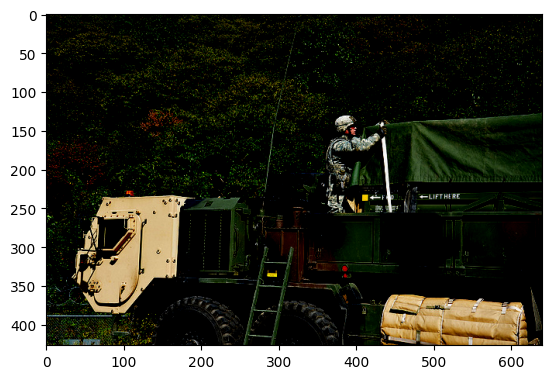

In [22]:
import matplotlib.pyplot as plt
import cv2

plt.imshow(image.permute(1, 2, 0) )

In [23]:
num = len(target['boxes'])

igg = image.permute(1, 2, 0).numpy().astype(np.uint8).copy()
for i in range(num):
  x1, y1, x2, y2 = np.array(target['boxes'][i]).astype("int")
  print(x1,y1,x2,y2)
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (255, 0, 0), 1)

359 130 444 259


In [24]:
type(target['boxes'][i])

torch.Tensor

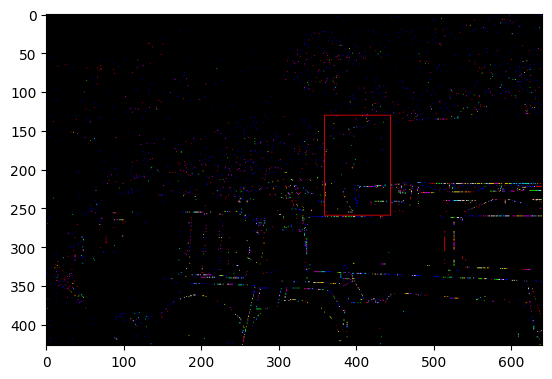

In [25]:
plt.imshow(igg)

# Modeling and Finetuning from a pretrained model

In [26]:
# model 2, kita coba ini
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights="DEFAULT")

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 2  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 70.6MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

# Training Model

In [27]:
from engine import train_one_epoch, evaluate
#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#model.to(device)

# construct an optimizer
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(
    params,
    lr=0.005,
    momentum=0.9,
    weight_decay=0.0001
)

# and a learning rate scheduler
lr_scheduler = torch.optim.lr_scheduler.StepLR(
    optimizer,
    step_size=3,
    gamma=0.1
)

num_epochs = 5

for epoch in range(num_epochs):
    # train for one epoch, printing every 10 iterations
    train_one_epoch(model, optimizer, train_loader, device, epoch, print_freq=10)
    # update the learning rate
    lr_scheduler.step()
    # evaluate on the test dataset
    evaluate(model, test_loader, device=device)

print("That's it!")

Epoch: [0]  [   0/1000]  eta: 2:30:09  lr: 0.000010  loss: 1.0728 (1.0728)  loss_classifier: 0.7135 (0.7135)  loss_box_reg: 0.1983 (0.1983)  loss_objectness: 0.1372 (0.1372)  loss_rpn_box_reg: 0.0238 (0.0238)  time: 9.0100  data: 0.0533  max mem: 5974
Epoch: [0]  [  10/1000]  eta: 0:32:08  lr: 0.000060  loss: 1.0728 (1.0289)  loss_classifier: 0.6540 (0.6374)  loss_box_reg: 0.3043 (0.2941)  loss_objectness: 0.0516 (0.0697)  loss_rpn_box_reg: 0.0195 (0.0277)  time: 1.9482  data: 0.0513  max mem: 6792
Epoch: [0]  [  20/1000]  eta: 0:25:22  lr: 0.000110  loss: 0.9224 (1.0214)  loss_classifier: 0.4231 (0.4890)  loss_box_reg: 0.3214 (0.3079)  loss_objectness: 0.0516 (0.1685)  loss_rpn_box_reg: 0.0262 (0.0560)  time: 1.1804  data: 0.0478  max mem: 6792
Epoch: [0]  [  30/1000]  eta: 0:23:42  lr: 0.000160  loss: 0.7121 (0.8600)  loss_classifier: 0.2194 (0.3898)  loss_box_reg: 0.2649 (0.2820)  loss_objectness: 0.0645 (0.1404)  loss_rpn_box_reg: 0.0308 (0.0478)  time: 1.2008  data: 0.0470  max me

In [28]:
evaluate(model, test_loader, device=device)

creating index...
index created!
Test:  [  0/125]  eta: 0:01:13  model_time: 0.5186 (0.5186)  evaluator_time: 0.0124 (0.0124)  time: 0.5877  data: 0.0530  max mem: 8205
Test:  [100/125]  eta: 0:00:15  model_time: 0.5798 (0.5650)  evaluator_time: 0.0128 (0.0140)  time: 0.6410  data: 0.0500  max mem: 8205
Test:  [124/125]  eta: 0:00:00  model_time: 0.5788 (0.5651)  evaluator_time: 0.0087 (0.0144)  time: 0.6390  data: 0.0474  max mem: 8205
Test: Total time: 0:01:18 (0.6290 s / it)
Averaged stats: model_time: 0.5788 (0.5651)  evaluator_time: 0.0087 (0.0144)
Accumulating evaluation results...
DONE (t=0.12s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.762
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.497
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.250
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=med

In [29]:
# save model to drive
torch.save(model.state_dict(), '/content/drive/MyDrive/Colab Notebooks/fastrcnn_model_1000.pt')


# Testing Model

In [30]:
transform1 = T.Compose([
    T.ToTensor(),
])

In [31]:
ig = Image.open("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
img = transform1(ig).to('cuda')

In [32]:
with torch.no_grad():
  pred = model([img])

In [33]:
pred

[{'boxes': tensor([[209.9604,  76.5869, 308.7803, 194.7833],
          [ 12.0902, 111.6754, 200.6165, 390.7365],
          [435.5123, 132.3829, 632.1035, 397.9018],
          [327.2591,  97.9423, 474.4084, 276.8436],
          [321.9271, 102.1976, 528.6898, 384.8596],
          [ 73.1151, 115.5776, 200.3119, 218.7643],
          [ 59.0836,  92.9917, 581.7766, 419.4155],
          [ 28.7982, 102.7515, 345.6217, 410.6327]], device='cuda:0'),
  'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0'),
  'scores': tensor([0.9992, 0.9991, 0.9980, 0.9972, 0.1687, 0.0894, 0.0524, 0.0509],
         device='cuda:0')}]

In [34]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [35]:
num = torch.argwhere(scores > 0.6).shape[0]

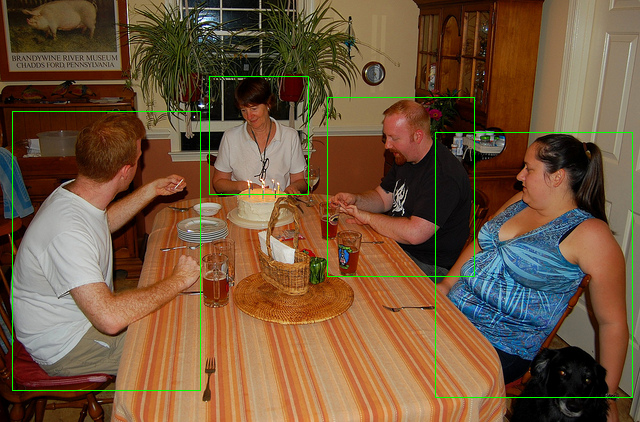

In [36]:
font = cv2.FONT_HERSHEY_SIMPLEX
igg = cv2.imread("/root/fiftyone/coco-2017/train/data/000000000790.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)

cv2_imshow(igg)

In [37]:
ig = Image.open("/root/fiftyone/coco-2017/train/data/000000005260.jpg")
img = transform1(ig).to('cuda')
with torch.no_grad():
  pred = model([img])
pred

[{'boxes': tensor([[325.3782, 118.8570, 406.6522, 282.9057],
          [ 82.1664, 138.0844, 175.9807, 320.6438],
          [395.8990, 158.7440, 467.9785, 334.4581],
          [571.1793, 168.5752, 613.2161, 282.7400],
          [268.4449, 138.6461, 314.8589, 276.6314],
          [ 47.4123, 136.7097, 101.9738, 254.7847],
          [197.5206, 135.1413, 247.1650, 236.2309],
          [197.7662, 221.3860, 280.7115, 326.0607],
          [174.9836, 143.2340, 203.1708, 221.1655],
          [537.8489, 162.0926, 567.0141, 213.5516],
          [ 43.7079, 139.3435,  69.5989, 203.4220],
          [492.2275, 214.2277, 514.0668, 272.6008],
          [ 10.1439, 147.2609,  25.9320, 262.5592],
          [178.8990, 132.2256, 550.6354, 312.8450],
          [ 64.1204, 127.8640, 356.5574, 324.0710],
          [ 43.5061, 139.7764,  76.3210, 252.6059],
          [500.7361, 219.7105, 516.1725, 269.9790],
          [484.3753, 210.9650, 508.0901, 280.1036],
          [ 84.4446, 196.2225, 106.0132, 248.4875],
   

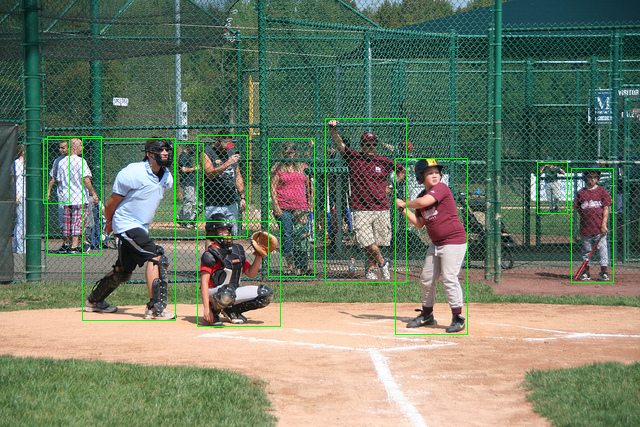

In [38]:
bboxes, label, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]
num = torch.argwhere(scores > 0.6).shape[0]
igg = cv2.imread("/root/fiftyone/coco-2017/train/data/000000005260.jpg")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].to('cpu').numpy().astype("int")
  igg = cv2.rectangle(igg, (x1, y1), (x2, y2), (0, 255, 0), 1)
cv2_imshow(igg)

# Evaluating model

In [39]:
print(dataset)
print(dataset_test)

Name:        coco-2017-train-4000
Media type:  image
Num samples: 4000
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
Name:        coco-2017-validation-500
Media type:  image
Num samples: 500
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detecti

In [40]:
# Print a ground truth detection
sample = dataset_test.first()
print(sample.ground_truth.detections[1])

<Detection: {
    'id': '656b5b60badc0384e8114f26',
    'attributes': {},
    'tags': [],
    'label': 'person',
    'bounding_box': [
        0.600671875,
        0.40424882629107983,
        0.023625,
        0.08389671361502347,
    ],
    'mask': None,
    'confidence': None,
    'index': None,
    'supercategory': 'person',
    'iscrowd': 0,
}>


In [41]:
# Choose a random subset of 20 samples to add predictions to
predictions_view = dataset_test.take(60, seed=51)

In [42]:
from PIL import Image
from torchvision.transforms import functional as func

import fiftyone as fo

# Get class list
classes = dataset.default_classes

# Add predictions to samples
with fo.ProgressBar() as pb:
    for sample in pb(predictions_view):
        # Load image
        image = Image.open(sample.filepath)
        image = func.to_tensor(image).to(device)
        c, h, w = image.shape

        # Perform inference
        preds = model([image])[0]
        labels = preds["labels"].cpu().detach().numpy()
        scores = preds["scores"].cpu().detach().numpy()
        boxes = preds["boxes"].cpu().detach().numpy()

        # Convert detections to FiftyOne format
        detections = []
        for label, score, box in zip(labels, scores, boxes):
            # Convert to [top-left-x, top-left-y, width, height]
            # in relative coordinates in [0, 1] x [0, 1]
            x1, y1, x2, y2 = box
            rel_box = [x1 / w, y1 / h, (x2 - x1) / w, (y2 - y1) / h]

            detections.append(
                fo.Detection(
                    label=classes[label],
                    bounding_box=rel_box,
                    confidence=score
                )
            )

        # Save predictions to dataset
        sample["faster_rcnn"] = fo.Detections(detections=detections)
        sample.save()

print("Finished adding predictions")

 100% |███████████████████| 60/60 [9.4s elapsed, 0s remaining, 5.7 samples/s]       


INFO:eta.core.utils: 100% |███████████████████| 60/60 [9.4s elapsed, 0s remaining, 5.7 samples/s]       


Finished adding predictions


In [43]:
session = fo.launch_app(dataset_test)
session.view = predictions_view

In [44]:
# Use the view bar to create an `Exists(faster_rcnn, True)` stage
# Now your view contains only the 100 samples with predictions in `faster_rcnn` field
session.show()

In [45]:
from fiftyone import ViewField as F

# Only contains detections with confidence >= 0.75
high_conf_view = predictions_view.filter_labels("faster_rcnn", (F("confidence") > 0.75) & (F("label").is_in(("person"))), only_matches=True)

In [46]:
# Print some information about the view
print(high_conf_view)

Dataset:     coco-2017-validation-500
Media type:  image
Num samples: 54
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    faster_rcnn:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
View stages:
    1. Take(size=60, seed=51)
    2. FilterLabels(field='faster_rcnn', filter={'$and': [{...}, {...}]}, only_matches=True, trajectories=False)


In [47]:
# Load high confidence view in the App
session.view = high_conf_view

In [48]:
# Evaluate the predictions in the `faster_rcnn` field of our `high_conf_view`
# with respect to the objects in the `ground_truth` field
results = high_conf_view.evaluate_detections(
    "faster_rcnn",
    gt_field="ground_truth",
    eval_key="eval",
    compute_mAP=True,

)

Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |███████████████████| 54/54 [834.7ms elapsed, 0s remaining, 64.7 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 54/54 [834.7ms elapsed, 0s remaining, 64.7 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |███████████████████| 54/54 [484.7ms elapsed, 0s remaining, 111.4 samples/s]      


INFO:eta.core.utils: 100% |███████████████████| 54/54 [484.7ms elapsed, 0s remaining, 111.4 samples/s]      


In [49]:
# Get the 10 most common classes in the dataset
counts = dataset_test.count_values("faster_rcnn.detections.label")
classes_top10 = sorted(counts, key=counts.get, reverse=True)[:10]

# Print a classification report for the top-10 classes
results.print_report(classes=classes_top10)

              precision    recall  f1-score   support

      person       0.91      0.72      0.81       221

   micro avg       0.91      0.72      0.81       221
   macro avg       0.91      0.72      0.81       221
weighted avg       0.91      0.72      0.81       221



In [50]:
print(results.mAP())

0.4641886435380837


In [51]:
plot = results.plot_pr_curves(classes=["person"])
plot.show()